# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [2]:
#Install Previously-Uninstalled Package
install.packages("pls")

#Load Libraries
library(pls)
library(tidyverse)
library(ggplot2)

Installing package into 'C:/Users/roman/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'pls' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\roman\AppData\Local\Temp\RtmpOKE12q\downloaded_packages


Warning message:
"package 'pls' was built under R version 4.2.3"

Attaching package: 'pls'


The following object is masked from 'package:stats':

    loadings


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame. 

In [28]:
# WRITE YOUR CODE HERE
setwd("C:/Users/roman/OneDrive/Documents/Python Scripts/Lapadat_DSPN_S22/book/exercises/unrestricted_trimmed_1_7_2020_10_50_44")
unrestricted_trimmed  <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

d1  <- unrestricted_trimmed %>%
    select(ends_with(c("Flanker_Unadj", "_Vol"))) %>%
    drop_na()

paste("x x x")
paste("Head: Unrestricted_Trimmed")
head(unrestricted_trimmed)

paste("x x x")
paste("Head: d1")
head(d1)

[1] "x x x"

[1] "Head: Unrestricted_Trimmed"

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


[1] "x x x"

[1] "Head: d1"

,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_L_WM_Hypointens_Vol,FS_R_WM_Hypointens_Vol,FS_L_Non.WM_Hypointens_Vol,FS_R_Non.WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,0,0,0,0,325,800,409,569,522,813
2,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,0,0,0,0,195,1029,526,578,576,649
3,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,0,0,0,0,302,972,589,528,471,858
4,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,0,0,0,0,296,1065,618,838,729,1072
5,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,0,0,0,0,235,1057,591,538,430,849
6,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,0,0,0,0,258,1033,494,487,489,992


---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [36]:
cor(d1[,2:57])
fs_cor  <- cor(d1[,2:57])

Warning message in cor(d1[, 2:57]):
"the standard deviation is zero"


,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,FS_R_WM_Vol,⋯,FS_L_WM_Hypointens_Vol,FS_R_WM_Hypointens_Vol,FS_L_Non.WM_Hypointens_Vol,FS_R_Non.WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
FS_IntraCranial_Vol,1.00000000,0.89775779,0.84001739,0.8439151,0.84527801,0.78851398,0.8751297,0.88515809,0.83110860,0.82780629,⋯,NA,NA,NA,NA,0.33097622,0.34486799,0.18960892,0.197341425,0.284599652,0.40182119
FS_BrainSeg_Vol,0.89775779,1.00000000,0.94481588,0.9482717,0.95026178,0.86899391,0.9664839,0.99584206,0.95025059,0.94827234,⋯,NA,NA,NA,NA,0.35006717,0.37677373,0.27243466,0.270768619,0.353484192,0.43087227
FS_LCort_GM_Vol,0.84001739,0.94481588,1.00000000,0.9844592,0.99601958,0.78978633,0.9821287,0.94856174,0.82823562,0.82204438,⋯,NA,NA,NA,NA,0.27354855,0.25151569,0.19618089,0.208943426,0.257297934,0.31406264
FS_RCort_GM_Vol,0.84391512,0.94827175,0.98445925,1.0000000,0.99619391,0.79257235,0.9830322,0.95186738,0.83308464,0.83075164,⋯,NA,NA,NA,NA,0.28341844,0.24448681,0.19182668,0.211885362,0.259001604,0.30540697
FS_TotCort_GM_Vol,0.84527801,0.95026178,0.99601958,0.9961939,1.00000000,0.79428656,0.9864250,0.95394600,0.83393307,0.82967591,⋯,NA,NA,NA,NA,0.27962765,0.24893064,0.19473767,0.211253307,0.259167897,0.31089656
FS_SubCort_GM_Vol,0.78851398,0.86899391,0.78978633,0.7925724,0.79428656,1.00000000,0.8407289,0.85912648,0.82483108,0.82505024,⋯,NA,NA,NA,NA,0.32808259,0.36367157,0.31694057,0.270171847,0.332095449,0.40412120
FS_Total_GM_Vol,0.87512975,0.96648393,0.98212867,0.9830322,0.98642496,0.84072890,1.0000000,0.95676918,0.84630850,0.84265274,⋯,NA,NA,NA,NA,0.30026585,0.26509338,0.21393596,0.227828080,0.273788710,0.32692300
FS_SupraTentorial_Vol,0.88515809,0.99584206,0.94856174,0.9518674,0.95394600,0.85912648,0.9567692,1.00000000,0.95657235,0.95448952,⋯,NA,NA,NA,NA,0.34304042,0.38403125,0.27388840,0.268821695,0.356887229,0.43655852
FS_L_WM_Vol,0.83110860,0.95025059,0.82823562,0.8330846,0.83393307,0.82483108,0.8463085,0.95657235,1.00000000,0.99720862,⋯,NA,NA,NA,NA,0.35983007,0.46628464,0.37067576,0.352852343,0.445780348,0.50126064
FS_R_WM_Vol,0.82780629,0.94827234,0.82204438,0.8307516,0.82967591,0.82505024,0.8426527,0.95448952,0.99720862,1.00000000,⋯,NA,NA,NA,NA,0.36438062,0.46048694,0.36768598,0.351758721,0.441418100,0.49765782


Warning message in cor(d1[, 2:57]):
"the standard deviation is zero"


(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [57]:
install.packages("reshape2")
library(reshape2)

melt_fs_cor  <- melt(fs_cor)
head(melt_fs_cor)
#melt_fs_cor

Warning message:
"package 'reshape2' is in use and will not be installed"
Using Var1, Var2 as id variables



,Var1,Var2,variable,value
,<fct>,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,value,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,value,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,value,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,value,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,value,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,value,0.7885140



Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

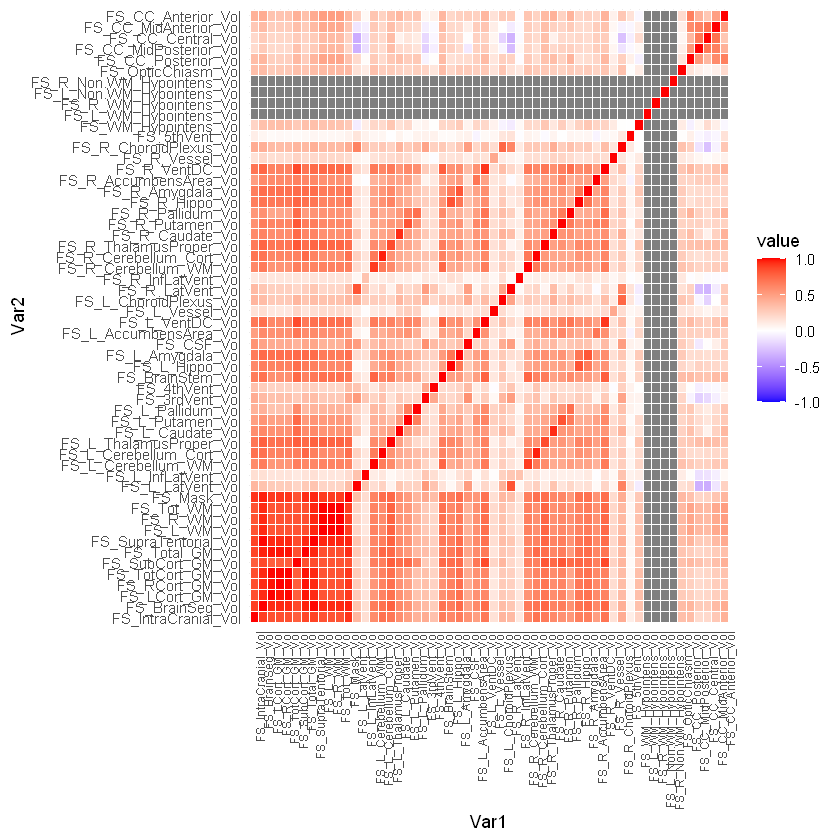

In [80]:

ggplot(data = melt_fs_cor, aes(x=Var1, y=Var2, fill=value)) + 
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "blue", high = "red", limit = c(-1,1)) +
    theme_minimal() +
    theme(axis.text.x=element_text(angle=90, vjust = 1, size = 7, hjust = 1))
    

What patterns do you see in the correlations?

> *We have a strong group of intercorrelated measures in the bottom left corner.* 
> * 


---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [88]:
library(pls)

set.seed(624)
pcr.fit=pcr(Flanker_Unadj~., data=d1 ,scale=TRUE, validation ="CV")
summary(pcr.fit)

Warning message in FUN(X[[i]], ...):
"Scaling with (near) zero standard deviation"


ERROR: Error in La.svd(X): infinite or missing values in 'x'


(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

In [ ]:
# WRITE YOUR CODE HERE


(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function. 

In [ ]:
# WRITE YOUR CODE HERE


What does this tell you about the underlying dimensionality of the brain volume measures? 

> *Write your response here* 
> * 


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [ ]:
# WRITE YOUR CODE HERE


(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

In [ ]:
# WRITE YOUR CODE HERE


(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [ ]:
# WRITE YOUR CODE HERE


What what does this plot tell you about how many components best explain variance in Flanker task performance? 

> *Write your response here*
> * 

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> *Write your response here* 

> 

**DUE:** 5pm EST, April 17, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*